In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft,fftfreq #funciones p/trabajar con la Transf. de Fourier

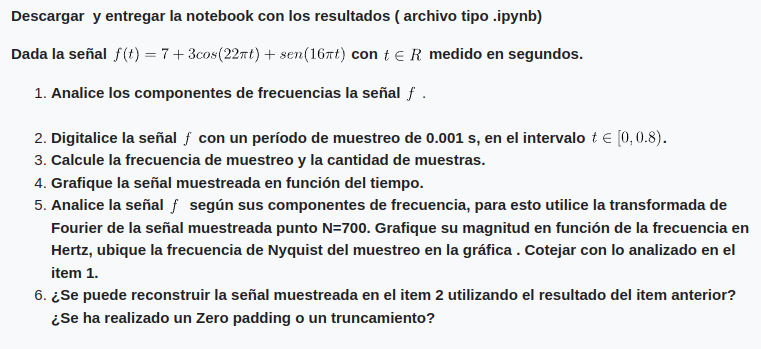

7*cos(22 pi t)+sin(16 pi t)

22 pi = 2 pi f 
22/2 = f

f1 = 11 

16 pi = 2 pi f
16/2 = f2

f2 = 8

Se analiza que la señal tiene **TRES** componentes frecuenciales:
* Uno en $f_0 = 0[Hz]$ con una amplitud de 7
* Otro en $f_1 = 11[Hz]$ con una amplitud de 3
* Otro en $f_2 = 8[Hz]$ con una amplitud de 1

800
800.0
Frecuencia de muestreo =  1000.0


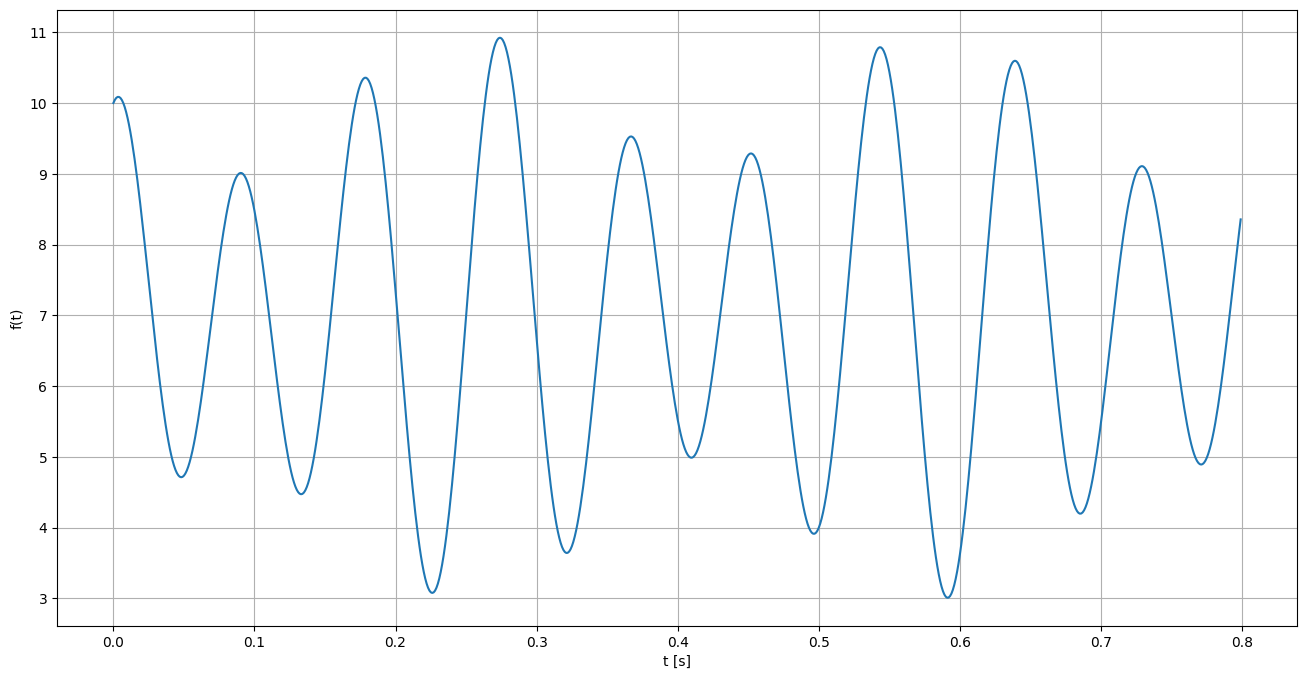

In [47]:
# vector de tiempos discretizados
Pm = 0.001 # período de muestreo
l = 0.8 # longitud del intervalo

t = np.arange(0, l, Pm)
print(len(t))
# frecuencia de muestreo
Fm = 1/Pm

# cantidad de muestras
M = l * Fm
print(M)
print("Frecuencia de muestreo = ", Fm)

# digitalización de la señal
f = 7 + (3 * np.cos(22* np.pi * t)) + np.sin(16* np.pi* t)

# se grafica la señal en función del tiempo
plt.figure(figsize=(16,8))
plt.plot(t, f)
plt.xlabel("t [s]")
plt.ylabel("f(t)")
plt.grid()
plt.show()

500.0


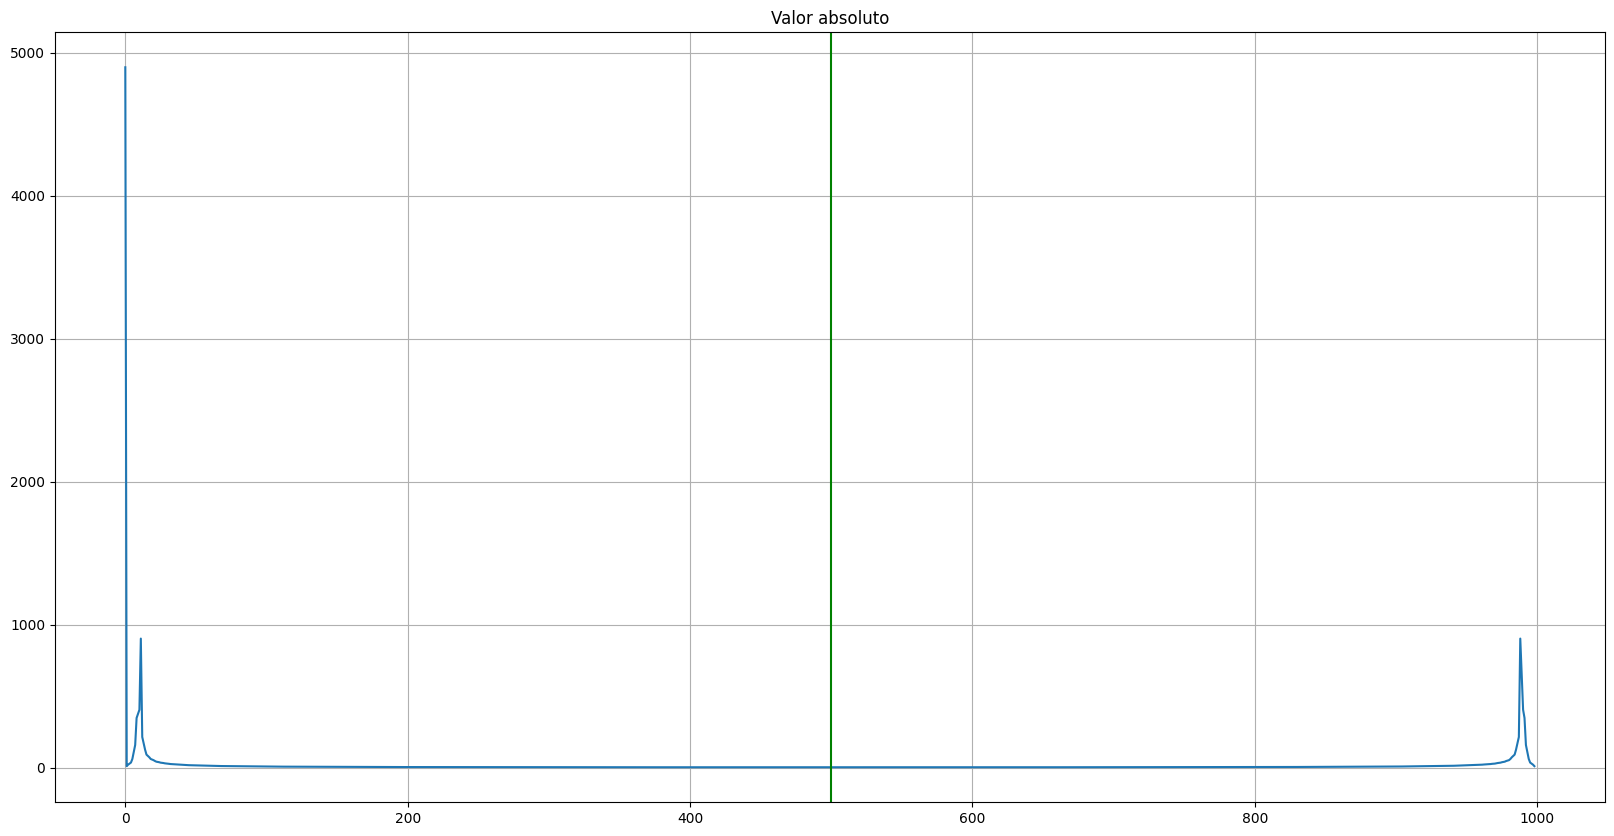

In [43]:
# análisis frecuencial de la señal x
N = 700 # cant de muestras en el dominio frecuencial
TFx = fft(f,N)
Nm = Fm//2
print(Nm)
# si 800 muestras --- 0.8s
#    700 muestras --- x = 0.7s
T = 0.7 # longitud del intervalo
fH = np.arange(N)//T # vector de frecuencias en Hz
fcH = np.arange(-N//2,N//2)//T # vector de frecuencias en Hz centrado en cero

plt.figure(figsize=(20,10))

#plt.subplot(411)
#plt.plot(fH, np.real(TFx))
#plt.title("Parte real")
#plt.axvline(Nm, color='green')
#plt.grid()

#plt.subplot(412)
#plt.plot(fH, np.imag(TFx))
#plt.title("Parte imaginaria")
#plt.axvline(Nm, color='green')
#plt.grid()

#plt.subplot(413)
plt.plot(fH, abs(TFx))
plt.title("Valor absoluto")
plt.axvline(Nm, color='green')
plt.grid()

#plt.subplot(414)
#plt.plot(fcH, np.abs(fftshift(TFx)))
#plt.title("Valor absoluto")
#plt.grid()



### Zoom de la transformada

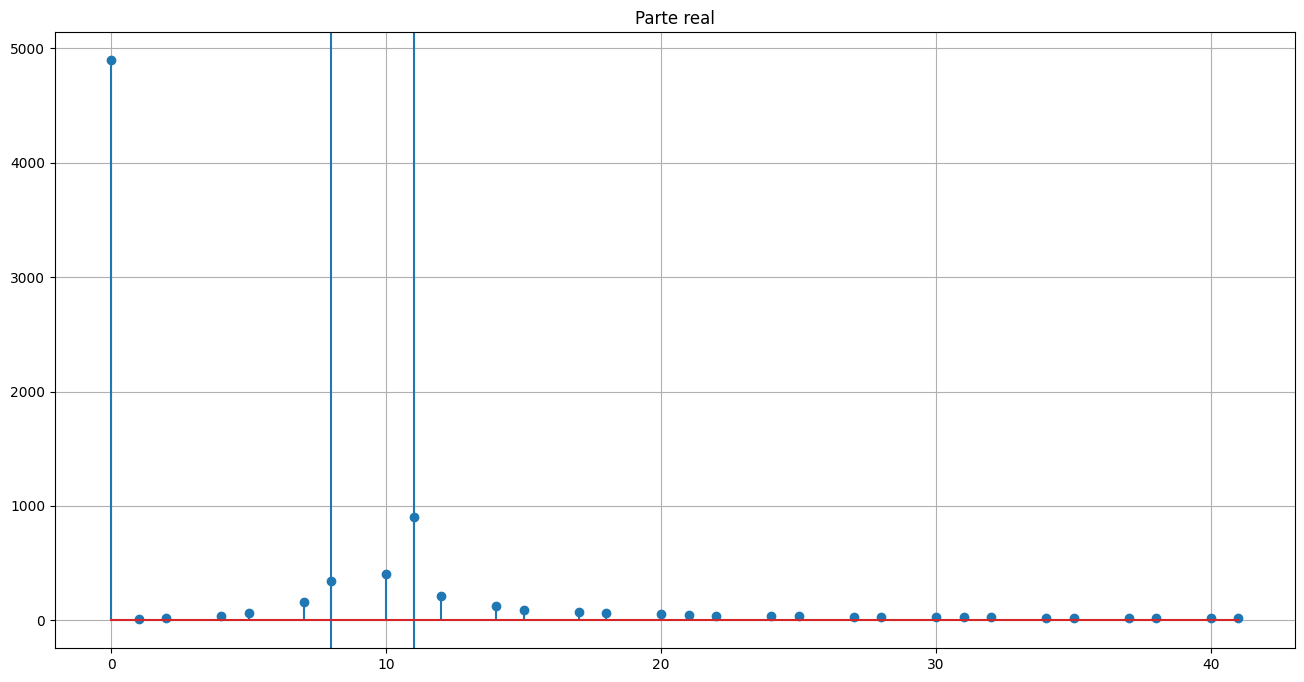

In [46]:
plt.figure(figsize=(16,8))

plt.axvline(8)
plt.axvline(11)
plt.stem(fH[0:30], abs(TFx[0:30]))
plt.title("Parte real")
plt.grid()

plt.show()

De la imágen con zoom podemos observar que se tienen 3 picos:
- Uno en cero (de mayor amplitud)
- Uno en 8Hz de menor amplitud
- Otro en 11Hz con una amplitud intermedia

Esto concuerda con lo observado en el análsis preliminar del punto (1)

Se determinará si se realizó un zero padding o un truncamiento

In [33]:
if(M > N):
    print("Truncamiento")
elif (M == N):
    print("Las muestras coinciden")
else:
    print("Zero padding")

Truncamiento


Vemos que se realiza un truncamiento, ya que la cantidad de muestras de la señal en el dominio del tiempo ($M$) es mayor que la cantidad de muestras en el dominio frecuencial ($N$), esto resulta en una pérdida de información de la señal. Podemos concluir que por este motivo, a partir de la transformada, no podremos recuperar la señal original. Para comprobar esto, se realizará la transformada inversa de la señal:

/home/fdiez/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/fdiez/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


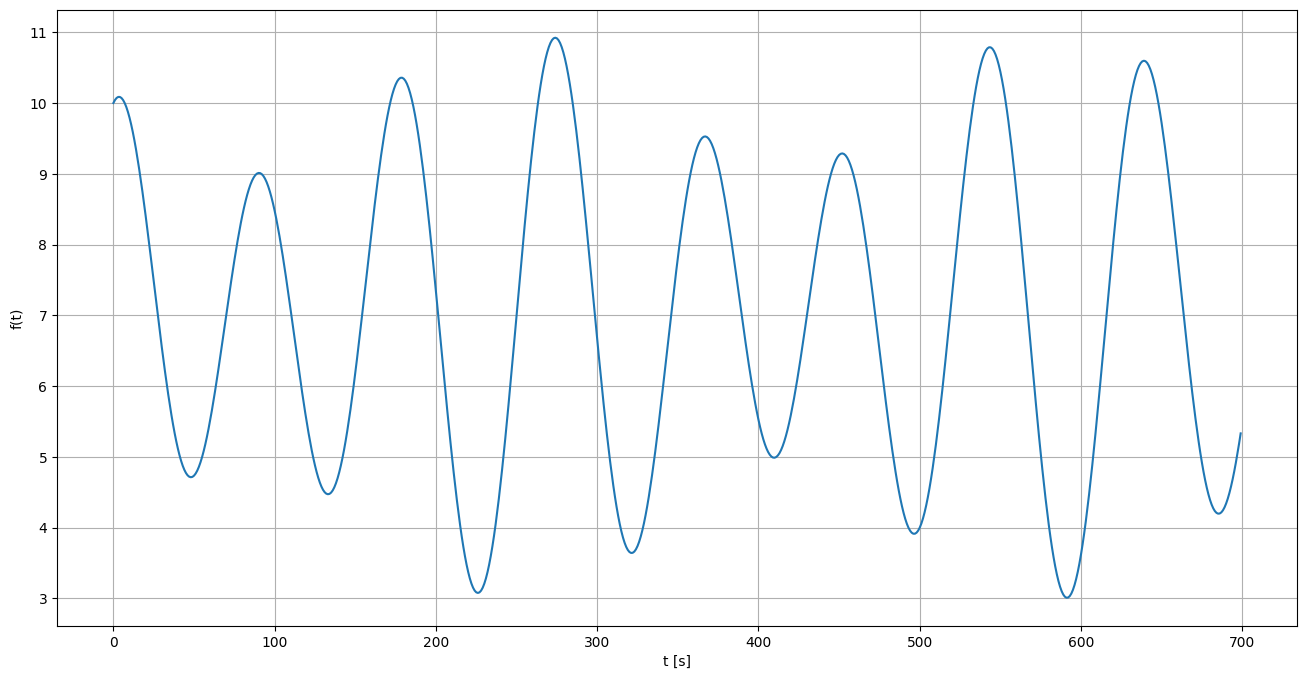

In [51]:
recup = ifft(TFx,N)

plt.figure(figsize=(16,8))
plt.plot(recup)
plt.xlabel("t [s]")
plt.ylabel("f(t)")
plt.grid()
plt.show()

Como vemos en la imágen, la señal recuperada se encuentra recortada 100 muestras, por lo que se reafirma la hipótesis de truncamiento.